## Importing the boat's CAN BUS data


In [6]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone
from utils.plots import plot_events_data

from utils import plot_styles

# plt.rcParams.update({
#     'figure.dpi' : 240,
#     'savefig.format' : 'pdf',
#     #
#     'text.usetex' : True,
#     'text.latex.preamble' : "\\usepackage{icomma}",
#     'figure.figsize' : plot_styles.get_figsize(columnwidth=455.0, unit='pt', hf_abs=),
#     #
#     "axes.labelsize": 12,
#     "font.size": 12,
#     "legend.fontsize": 12,
#     "xtick.labelsize": 12,
#     "ytick.labelsize": 12,
# })

input_path = "/home/joaoantoniocardoso/workspace_TCC/repo/code/data/final/"
input_filename = "unified_monotonic_data_1s.hdf5"
# input_filename = "unified_monotonic_data_100ms.hdf5"
df = vaex.open(input_path + input_filename).to_pandas_df()

# Localize the timestamp
tzinfo = timezone("America/Sao_Paulo")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_localize(timezone("UTC"))
df["timestamp"] = df["timestamp"].dt.tz_convert(tzinfo)
df["timestamp"]
df


timestamp  MCC19_1__MEASUREMENTS__SIGNATURE  \
0      2020-01-29 11:56:53-03:00                             225.0   
1      2020-01-29 11:56:54-03:00                             225.0   
2      2020-01-29 11:56:55-03:00                             225.0   
3      2020-01-29 11:56:56-03:00                             225.0   
4      2020-01-29 11:56:57-03:00                             225.0   
...                          ...                               ...   
350912 2020-02-02 13:25:25-03:00                             225.0   
350913 2020-02-02 13:25:26-03:00                             225.0   
350914 2020-02-02 13:25:27-03:00                             225.0   
350915 2020-02-02 13:25:28-03:00                             225.0   
350916 2020-02-02 13:25:29-03:00                             225.0   

        MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE  \
0                                   39.396343   
1                                   39.399273   
2                                   39.383572   
3                                   39.397011   
4                                   39.390011   
...                                       ...   
350912                              38.109543   
350913                              38.522369   
350914                              38.113560   
350915                              38.112896   
350916                              38.115383   

        MCC19_1__MEASUREMENTS__INPUT_CURRENT  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.000000   
4                                   0.000000   
...                                      ...   
350912                              0.001291   
350913                              0.005264   
350914                              0.003661   
350915                              0.002883   
350916                              0.000000   

        MCC19_1__MEASUREMENTS__INPUT_VOLTAGE  MCC19_1__MEASUREMENTS__DT  \
0                                   0.000000                   0.205811   
1                                   0.160266                   0.414806   
2                                   0.091235                   0.795847   
3                                   0.104958                   0.336668   
4                                   0.001667                   0.215064   
...                                      ...                        ...   
350912                              0.074959                   0.582422   
350913                              0.475321                   0.364479   
350914                              0.077154                   0.414381   
350915                              0.091004                   0.374817   
350916                              0.075395                   0.506479   

        MCB19_2__MEASUREMENTS__SIGNATURE  \
0                                  221.0   
1                                  221.0   
2                                  221.0   
3                                  221.0   
4                                  221.0   
...                                  ...   
350912                             221.0   
350913                             221.0   
350914                             221.0   
350915                             221.0   
350916                             221.0   

        MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE  \
0                                   13.188210   
1                                   13.190104   
2                                   13.196428   
3                                   13.203962   
4                                   13.195625   
...                                       ...   
350912                              13.187500   
350913                              13.189733   
350914                              13.190682   
350915                              13.184710   
350916                              13.196428  

## Transforming the boat's CAN data into boat's circuit data


In [7]:
[print(c) for c in sorted(df.columns)][0]


MAB19__PUMPS__PUMPS
MAB19__PUMPS__SIGNATURE
MAB19__STATE__ERROR
MAB19__STATE__SIGNATURE
MAB19__STATE__STATE
MAM19__MOTOR__D
MAM19__MOTOR__I
MAM19__MOTOR__SIGNATURE
MAM19__STATE__ERROR
MAM19__STATE__SIGNATURE
MAM19__STATE__STATE
MCB19_1__MEASUREMENTS__DT
MCB19_1__MEASUREMENTS__INPUT_VOLTAGE
MCB19_1__MEASUREMENTS__OUTPUT_CURRENT
MCB19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_1__MEASUREMENTS__SIGNATURE
MCB19_1__STATE__CONTROL
MCB19_1__STATE__SIGNATURE
MCB19_1__STATE__STATE
MCB19_2__MEASUREMENTS__DT
MCB19_2__MEASUREMENTS__INPUT_VOLTAGE
MCB19_2__MEASUREMENTS__OUTPUT_CURRENT
MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_2__MEASUREMENTS__SIGNATURE
MCB19_2__STATE__CONTROL
MCB19_2__STATE__SIGNATURE
MCB19_2__STATE__STATE
MCC19_1__MEASUREMENTS__DT
MCC19_1__MEASUREMENTS__INPUT_CURRENT
MCC19_1__MEASUREMENTS__INPUT_VOLTAGE
MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_1__MEASUREMENTS__SIGNATURE
MCC19_1__STATE__CONTROL
MCC19_1__STATE__SIGNATURE
MCC19_1__STATE__STATE
MCC19_2__MEASUREMENTS__DT
MCC19_2__MEASUR

In [8]:
ignored = [
    "MIN",
    "MAX",
    "STATE",
    "ERROR",
    "SIGNATURE",
    "MCS19",
    "MAB19",
    "PUMPS",
    "solcast",
]

columns = [tuple(c.split("__")) for c in sorted(df.columns) if all(x not in c for x in ignored)]
columns

[('MAM19', 'MOTOR', 'D'),
 ('MAM19', 'MOTOR', 'I'),
 ('MCB19_1', 'MEASUREMENTS', 'DT'),
 ('MCB19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCB19_1', 'MEASUREMENTS', 'OUTPUT_CURRENT'),
 ('MCB19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCB19_2', 'MEASUREMENTS', 'DT'),
 ('MCB19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCB19_2', 'MEASUREMENTS', 'OUTPUT_CURRENT'),
 ('MCB19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_1', 'MEASUREMENTS', 'DT'),
 ('MCC19_1', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_2', 'MEASUREMENTS', 'DT'),
 ('MCC19_2', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_3', 'MEASUREMENTS', 'DT'),
 ('MCC19_3', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_3', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_3', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_4', 'MEASUREMENTS', 'DT'),
 ('MCC19_4', 'MEASUR

## Checking the data on each column

<Figure size 10000x2000 with 0 Axes>

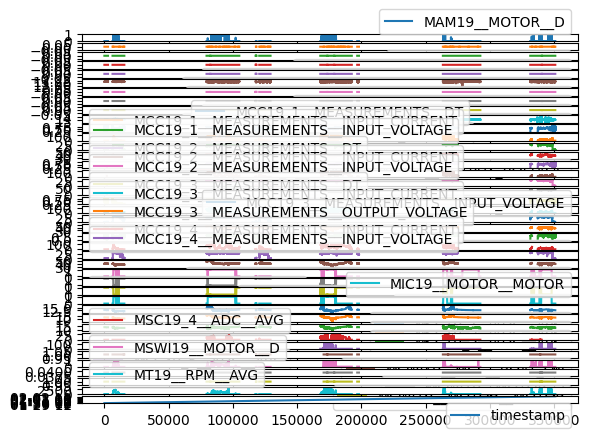

In [9]:
columns = [c for c in sorted(df.columns) if all(x not in c for x in ignored)]
plt.figure(figsize=(100,20))
df[columns].plot(subplots=True)
plt.show()

### Selecting the data of interest


In [10]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
number_of_mppts = 4
number_of_battery_cells = 3
number_of_mcbs = 2
system_data = {
    "Battery Pack Voltage": col("MCS19", "BAT", "AVG"),
    "Battery Cell Voltage": [
        col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    ],
    "Battery Input Current": col("MSC19_4", "ADC", "AVG"),
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "ESC Duty Cycle": col("MSWI19", "MOTOR", "D"),
    "ESC Motor On": col("MIC19", "MOTOR", "MOTOR"),
    "ESC Boat On": col("MIC19", "MCS", "BOAT_ON"),
    "Motor Angular Speed": col("MT19", "RPM", "AVG"),
    "MPPT Input Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mppts)
    ],
    "MCB Input Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Current": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mcbs)
    ],
    "MCB Duty Cycle": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mcbs)
    ],
}
system_data


{'Battery Pack Voltage': 'MCS19__BAT__AVG',
 'Battery Cell Voltage': ['MSC19_1__ADC__AVG',
  'MSC19_2__ADC__AVG',
  'MSC19_3__ADC__AVG'],
 'Battery Input Current': 'MSC19_4__ADC__AVG',
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'ESC Duty Cycle': 'MSWI19__MOTOR__D',
 'ESC Motor On': 'MIC19__MOTOR__MOTOR',
 'ESC Boat On': 'MIC19__MCS__BOAT_ON',
 'Motor Angular Speed': 'MT19__RPM__AVG',
 'MPPT Input Voltage': ['MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE'],
 'MPPT Output Voltage': ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'MPPT Input Current': ['MCC19_1__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_2__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_4__MEASUREMENTS__INPUT_CURRENT'],
 'MPPT Output Current': ['MCC

In [11]:
plt.rcdefaults()

# # Set the style globally
# plt.style.use("seaborn-v0_8-white")

# plt.rcParams["font.size"] = 10
# plt.rcParams["axes.labelsize"] = 10
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 8
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 8
# plt.rcParams["legend.fontsize"] = 10
# plt.rcParams["figure.titlesize"] = 12
# plt.rcParams["axes.formatter.useoffset"] = False
# plt.rcParams["text.usetex"] = True

figwidth, figheight = plt.figaspect(0.5 / 1.68)  # type: ignore

events = [
    {
        "name": "01.Curta",
        "start": Timestamp(
            year=2020, month=1, day=29, hour=13, minute=51, second=59, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=29, hour=15, minute=5, second=32, tzinfo=tzinfo
        ),
    },
    {
        "name": "02.Longa",
        "start": Timestamp(
            year=2020, month=1, day=30, hour=11, minute=16, second=45, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=30, hour=14, minute=55, second=30, tzinfo=tzinfo
        ),
    },
    {
        "name": "03.Revezamento",
        "start": Timestamp(
            year=2020, month=1, day=31, hour=11, minute=23, second=23, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=31, hour=13, minute=27, second=23, tzinfo=tzinfo
        ),
    },
    {
        "name": "04.Curta",
        "start": Timestamp(
            year=2020, month=2, day=1, hour=10, minute=15, second=15, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=1, hour=11, minute=37, second=28, tzinfo=tzinfo
        ),
    },
    {
        "name": "05.Curta",
        "start": Timestamp(
            year=2020, month=2, day=1, hour=13, minute=15, second=9, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=1, hour=13, minute=37, second=28, tzinfo=tzinfo
        ),
    },
    {
        "name": "07.Sprint",
        "start": Timestamp(
            year=2020, month=2, day=2, hour=11, minute=58, second=27, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=2, hour=11, minute=59, second=9, tzinfo=tzinfo
        ),
    },
]


In [12]:
def check_bit(df, bit):
    x = df.to_numpy().astype("uint8")
    return ((x) & (1 << bit)) >= 0.5


In [13]:
df["boat_on"] = check_bit(df[system_data["ESC Boat On"]], bit=0)
# df['mppts_on'] = check_bit(df[system_data['MPPT On']], bit=0)
df["dms_on"] = check_bit(df[system_data["ESC Motor On"]], bit=1)
df["motor_on"] = check_bit(df[system_data["ESC Motor On"]], bit=0)


# Battery Voltage
if True:
    for i in range(len(system_data["Battery Cell Voltage"])):
        df[f"bat{i + 1}_v"] = df[system_data["Battery Cell Voltage"][i]]
    df["bat_v"] = df["esc_vi"] = df["mppt_vo"] = (
        df["bat1_v"] + df["bat2_v"] + df["bat3_v"]
    )


# Use MPPT model to compute its output power
if True:

    def mppt_eff(mppt_pi: np.float64) -> np.float64:
        return np.float64(0.92)

    df["mppt_pi"] = np.zeros(len(df))
    for i in range(len(system_data["MPPT Output Voltage"])):
        df[f"mppt{i + 1}_vi"] = df[system_data["MPPT Input Voltage"][i]]
        df[f"mppt{i + 1}_vo"] = df[system_data["MPPT Output Voltage"][i]]
        df[f"mppt{i + 1}_ii"] = (
            df[system_data["MPPT Input Current"][i]] * 0.1
        )  # Fix wrong scale
        df[f"mppt{i + 1}_dt"] = df[system_data["MPPT Duty Cycle"][i]]

        df[f"mppt{i + 1}_pi"] = df[f"mppt{i + 1}_ii"] * df[f"mppt{i + 1}_vi"]

        df["mppt_pi"] = df["mppt_pi"] + df[f"mppt{i + 1}_pi"]
    df["mppt_po"] = df["mppt_pi"] * mppt_eff(
        df["mppt_pi"].to_numpy()
    )  # model-based data
    df["mppt_io"] = (
        df["mppt_po"] / df["mppt_vo"]
    )  # This division is safe because mppt output voltage is far from zero


# From the node analysis, compute currents and powers
if True:
    df["bat_io"] = df[system_data["Battery Output Current"]]
    df['bat_ii'] = df[system_data["Battery Input Current"]]
    df['bat_i'] = df['bat_io'] - df['bat_ii']  # sensor-based data
    df["esc_ii"] = df["bat_i"] + df["mppt_io"]  # model-based data #  TODO: Add aux power supply consumption
    df["bat_po"] = df["bat_v"] * df["bat_io"]  # sensor-based data
    df["bat_pi"] = df["bat_v"] * df["bat_ii"]  # model-based data
    df["bat_p"] = df["bat_v"] * df["bat_i"]  # sensor-based data


# Compute ESC powers
if True:

    def esc_eff(esc_pi: np.float64) -> np.float64:
        return np.float64(0.8)

    df["esc_dt"] = df[system_data["ESC Duty Cycle"]]
    df["esc_pi"] = df["esc_vi"] * df["esc_ii"]  # model-based data
    df["esc_po"] = df["motor_pi"] = df["esc_pi"] * esc_eff(
        df["esc_pi"].to_numpy()
    )  # model-based data **2
    df['motor_vi'] = df['esc_vo'] = df['esc_dt'] * df['esc_vi']  # model-based data
    df['motor_ii'] = df['esc_io'] = df['esc_po'] / df['esc_vo']  # model-based data **3


# Use motor parameters to compute its outputs
if True:

    def motor_eff(x, a=1.27443456, b=-280.17188206):
        # 'x' is the input power of the motor, we are linearizing it here
        # Clipping because zero is a pole for this model
        P_E = (a * x + b).clip(min=0.1)

        # Parameters from the optimized model
        R_A = 0.03079777
        B_M = 9.3300e-04
        K_T = 0.10390329

        # Voltage is fixated to 36V for this simplified model
        V_A = 36

        # eta function broken into parts to be easier to digest
        i_a = P_E / V_A
        eta_p1 = -(B_M * R_A**2 * i_a) / (K_T**2 * V_A)
        eta_p2 = 2 * B_M * R_A / K_T**2
        eta_p3 = -(B_M * V_A) / (K_T**2 * i_a)
        eta_p4 = -(R_A * i_a) / V_A
        eta = 1 + eta_p1 + eta_p2 + eta_p3 + eta_p4

        # Efficiency can never be below 0 of above 1
        return eta.clip(min=0, max=1)

    motor_params = {
        "K_T": 0.10390329,
    }
    df["motor_rpm"] = df["trans_rpmi"] = df[system_data["Motor RPM"]]
    df["motor_po"] = df["trans_pi"] = df["motor_pi"] * motor_eff(
        df["motor_pi"].to_numpy()
    )
    rpm_to_rps = 2 * np.pi / 60
    df['motor_torq'] = df['motor_po'] / (df['motor_rpm'] * rpm_to_rps)  # Invalid because of data inconsistency
    # df['motor_ii'] = df['esc_io'] = df['motor_torq'] / motor_params['K_T']  # invalid too

# Compute transmission
if True:

    def transmission_eff(input_power: np.float64):
        return 0.8

    transmission_params = {
        "ratio": 1 / 1.6,
    }
    df["trans_rpmo"] = df["prop_rpm"] = df["trans_rpmi"] * transmission_params["ratio"]
    df["trans_po"] = df["prop_pi"] = df["trans_pi"] * transmission_eff(
        df["trans_pi"].to_numpy()
    )
    df["trans_torqo"] = df["prop_torq"] = df["trans_po"] / (
        df["trans_rpmo"] * rpm_to_rps
    )
    df['trans_torqi'] = df['motor_torq'] = df["trans_torqo"] / transmission_eff(
        df["trans_pi"].to_numpy()
    )

# Compute theoretical propeller (https://ittc.info/media/1203/75-01-02-01.pdf)
if True:
    prop_params = {
        "pitch": 13,  # inches
        "diameter": 11,  # inches
    }
    # inches_to_m = 2.54e-2
    inches_to_km = 2.54e-5
    rpm_to_rph = 60
    # rho_water = 997 # density in kg/m³
    # prop_disc_area = np.pi * prop_params['diameter']**2 / 4
    # Power loading coefficient for ship speed
    # Cps = df['prop_pi'] / ( 0.5 * rho_water * df['boat_speed']**3 * prop_disc_area )
    # Theoretical boat speed
    # V = w * pitch
    ideal_prop_speed = (df["prop_rpm"] * rpm_to_rph) * (
        prop_params["pitch"] * inches_to_km
    )  # Theoretical 100% efficiency boat speed in km


def solve_mcbs(df):
    df["mcb_po"] = np.zeros(len(df))
    for i in range(len(system_data["MCB Output Voltage"])):
        df[f"mcb{i + 1}_vi"] = df[system_data["MCB Input Voltage"][i]]
        df[f"mcb{i + 1}_vo"] = df[system_data["MCB Output Voltage"][i]]
        df[f"mcb{i + 1}_io"] = df[system_data["MCB Output Current"][i]]
        df[f"mcb{i + 1}_dt"] = df[system_data["MCB Duty Cycle"][i]]

        df[f"mcb{i + 1}_po"] = df[f"mcb{i + 1}_io"] * df[f"mcb{i + 1}_vo"]

        df["mcb_po"] = df["mcb_po"] + df[f"mcb{i + 1}_po"]
    return df

df = solve_mcbs(df)


KeyError: 'Motor RPM'

In [ ]:
# %matplotlib widget
%matplotlib inline
plt.close('all')

start = pd.Timestamp(year=2020, month=1, day=31, hour=12, minute=9, second=0, tzinfo=tzinfo)
end = pd.Timestamp(year=2020, month=1, day=31, hour=12, minute=13, second=0, tzinfo=tzinfo)

df_sel = df
df_sel = df_sel[
    (df["timestamp"] >= start) & (df["timestamp"] <= end)
]

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20,6))

ax1.plot(df_sel.index, df_sel['mppt_io'], label='mppt_io')
ax1.plot(df_sel.index, df_sel['bat_ii'], label='bat_ii')
ax1.plot(df_sel.index, df_sel['bat_io'], label='bat_io')
ax1.plot(df_sel.index, df_sel['esc_ii'], label='esc_ii')
ax1.plot(df_sel.index, df_sel['bat_i'], '--', label='bat_i')
ax1.legend()

ax2.plot(df_sel.index, df_sel['mppt_po'], label='mppt_po')
ax2.plot(df_sel.index, df_sel['bat_pi'], label='bat_pi')
ax2.plot(df_sel.index, df_sel['bat_po'], label='bat_po')
ax2.plot(df_sel.index, df_sel['esc_pi'], label='esc_pi')
ax2.plot(df_sel.index, df_sel['bat_p'], '--', label='bat_p')
ax2.legend()

ax3.plot(df_sel.index, df_sel['esc_dt'], label='esc_dt')
ax3.plot(df_sel.index, df_sel['motor_rpm'] / df_sel['motor_rpm'].max(), label='motor_rpm (normalized)')
ax3.legend()
plt.show()

In [ ]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["esc_dt", "boat_on", "motor_on"],
    "ESC Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["motor_rpm"],
    "Motor RPM",
)

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["motor_po", "motor_pi"],
    "Motor Power",
)
plt.show()


In [ ]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["bat_v"],
    "Battery Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["bat_io", "bat_ii"],
    "Battery Output Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["bat_po"],
    "Battery Output Power",
)
plt.show()


In [ ]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["solcast_poa", "mppt_pi", "mppt_po"],
    "MPPT Input and output Power (total)",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_dt", "mppt2_dt", "mppt3_dt", "mppt4_dt"],
    "MPPT Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_ii", "mppt2_ii", "mppt3_ii", "mppt4_ii"],
    "MPPT Input Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_vi", "mppt2_vi", "mppt3_vi", "mppt4_vi"],
    "MPPT Input Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_pi", "mppt2_pi", "mppt3_pi", "mppt4_pi"],
    "MPPT Input Power",
)
plt.show()


In [ ]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_vi", "mcb2_vi"],
    "MCB Input Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_dt", "mcb2_dt"],
    "MCB Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_io", "mcb2_io"],
    "MCB Output Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_vo", "mcb2_vo"],
    "MCB Output Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_po", "mcb2_po"],
    "MCB Output Power",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb_po"],
    "MCB Output Power (total)",
)
plt.show()


## Remove raw data columns


In [ ]:
cols_to_keep = [
    "bat_i",
    "bat_ii",
    "bat_io",
    "bat_pi",
    "bat_po",
    "bat_p",
    "bat_v",
    "bat1_v",
    "bat2_v",
    "bat3_v",
    "boat_on",
    "dms_on",
    "esc_dt",
    "esc_ii",
    "esc_pi",
    "esc_po",
    "esc_vi",
    "esc_vo",
    "mcb_po",
    "mcb1_dt",
    "mcb1_io",
    "mcb1_po",
    "mcb1_vi",
    "mcb1_vo",
    "mcb2_dt",
    "mcb2_io",
    "mcb2_po",
    "mcb2_vi",
    "mcb2_vo",
    "motor_ii",
    "motor_on",
    "motor_pi",
    "motor_po",
    "motor_rpm",
    "motor_torq",
    "motor_vi",
    "mppt_io",
    "mppt_pi",
    "mppt_po",
    "mppt_vo",
    "mppt1_dt",
    "mppt1_ii",
    # "mppt1_io", TODO
    "mppt1_pi",
    # "mppt1_po", TODO
    "mppt1_vi",
    "mppt1_vo",
    "mppt2_dt",
    "mppt2_ii",
    # "mppt2_io", TODO
    "mppt2_pi",
    # "mppt2_po", TODO
    "mppt2_vi",
    "mppt2_vo",
    "mppt3_dt",
    "mppt3_ii",
    # "mppt3_io", TODO
    "mppt3_pi",
    # "mppt3_po", TODO
    "mppt3_vi",
    "mppt3_vo",
    "mppt4_dt",
    "mppt4_ii",
    # "mppt4_io", TODO
    "mppt4_pi",
    # "mppt4_po", TODO
    "mppt4_vi",
    "mppt4_vo",
    "prop_pi",
    # "prop_po", TODO
    "prop_rpm",
    "prop_torq",
    "solcast_AirTemp",
    "solcast_energy",
    "solcast_poa",
    "timestamp",
    "trans_pi",
    "trans_po",
    "trans_rpmi",
    "trans_rpmo",
    "trans_torqi",
    "trans_torqo",
]
df = df[cols_to_keep]

# df.to_csv("models/2020/boat_data_1s.csv")
df.to_csv("models/2020/boat_data_100ms.csv")


## Statistics


In [ ]:
for event in events:
    df_sel = df[(df["timestamp"] >= event["start"]) & (df["timestamp"] <= event["end"])]

    print("-" * 80, end="\n\n")
    print("Event:", event["name"], end="\n\n")
    print(df_sel.describe().transpose()[["mean", "std", "min", "max"]])


--------------------------------------------------------------------------------

Event: 01.Curta

                   mean         std  min     max
bat_i               NaN         NaN  NaN     NaN
bat_ii         0.000000    0.000000  0.0     0.0
bat_io              NaN         NaN  NaN     NaN
bat_pi         0.000000    0.000000  0.0     0.0
bat_po              NaN         NaN  NaN     NaN
...                 ...         ...  ...     ...
trans_po            NaN         NaN  NaN     NaN
trans_rpmi   873.834717  886.242371  0.0  2280.0
trans_rpmo   546.146729  553.901489  0.0  1425.0
trans_torqi         NaN         NaN  NaN     NaN
trans_torqo         NaN         NaN  NaN     NaN

[69 rows x 4 columns]
--------------------------------------------------------------------------------

Event: 02.Longa

                    mean         std  min          max
bat_i                NaN         NaN  NaN          NaN
bat_ii          0.521763    2.611622  0.0    22.515625
bat_io               NaN  

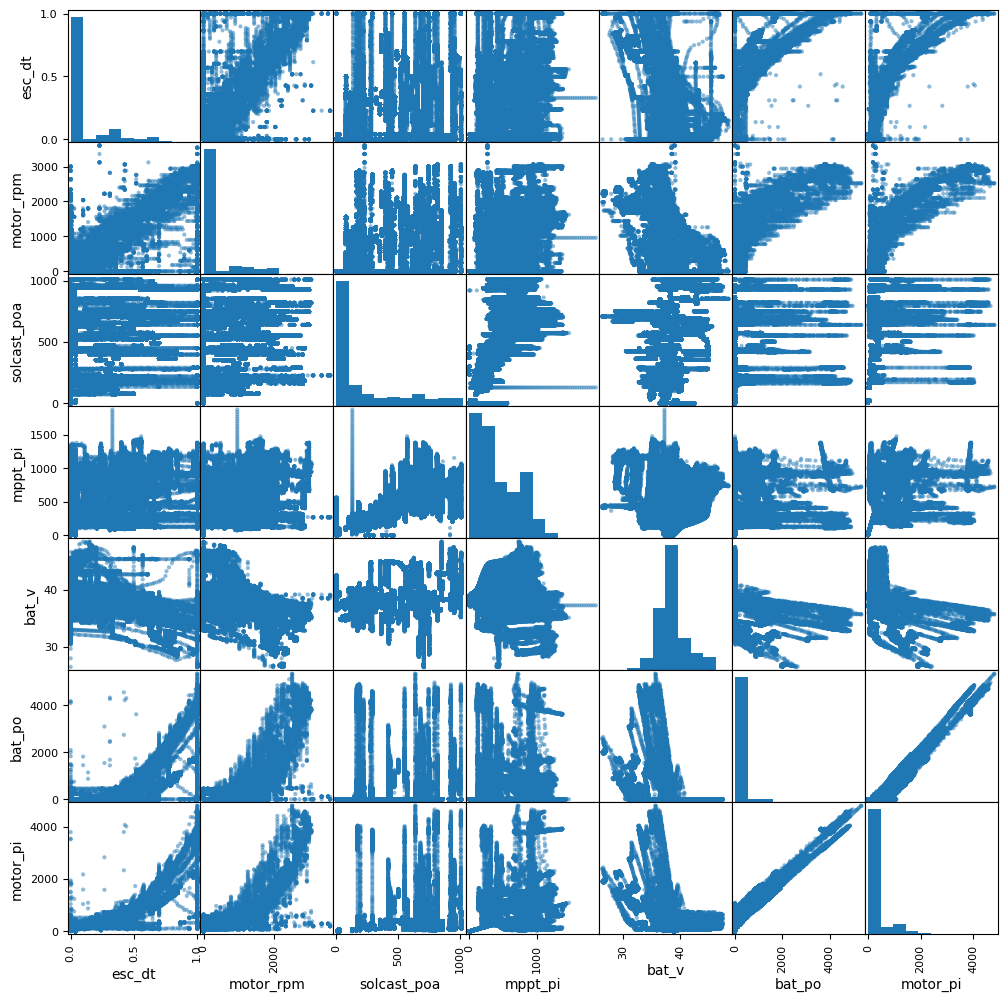

In [ ]:
from pandas.plotting import scatter_matrix

# %config InlineBackend.figure_format = 'retina'

scatter_matrix(
    df[
        ["esc_dt", "motor_rpm", "solcast_poa", "mppt_pi", "bat_v", "bat_po", "motor_pi"]
    ],
    figsize=(12, 12),
)
plt.show()


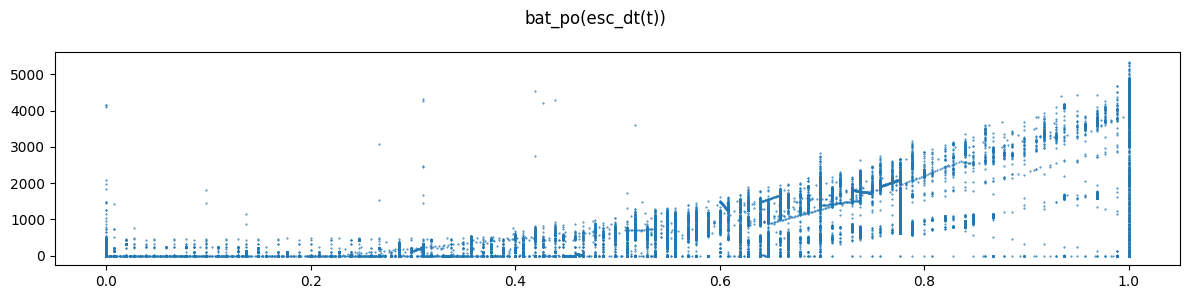

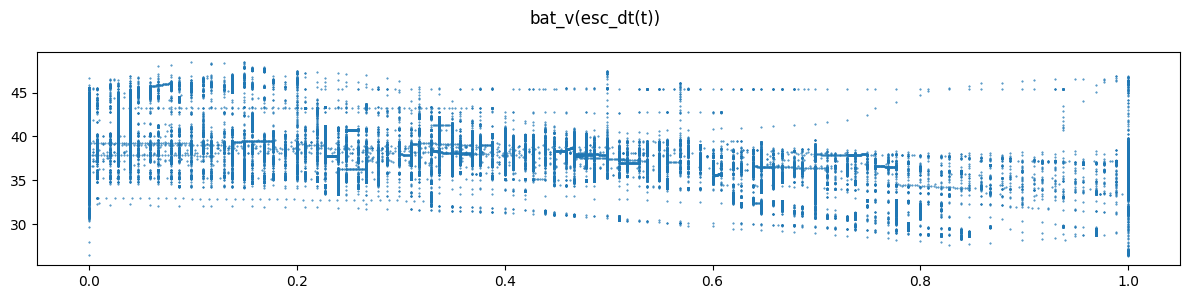

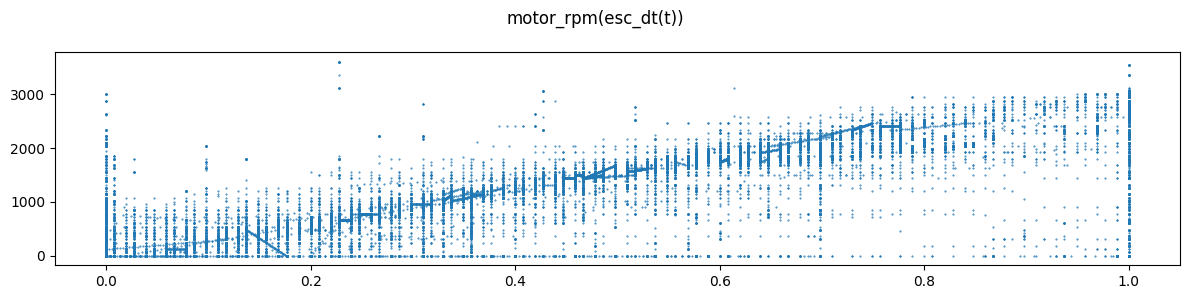

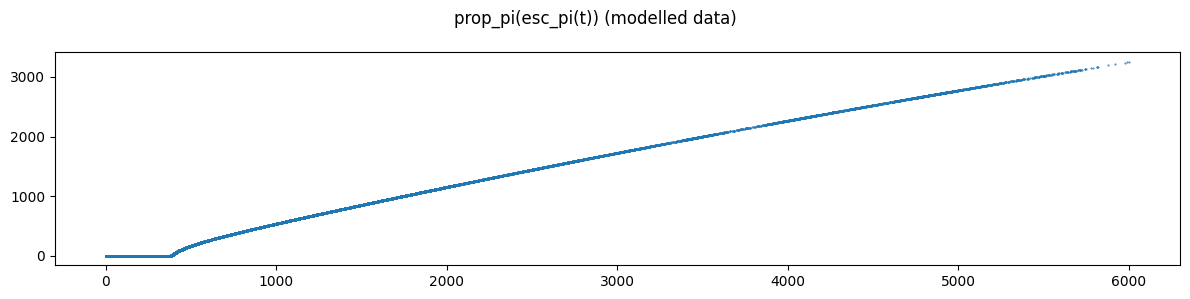

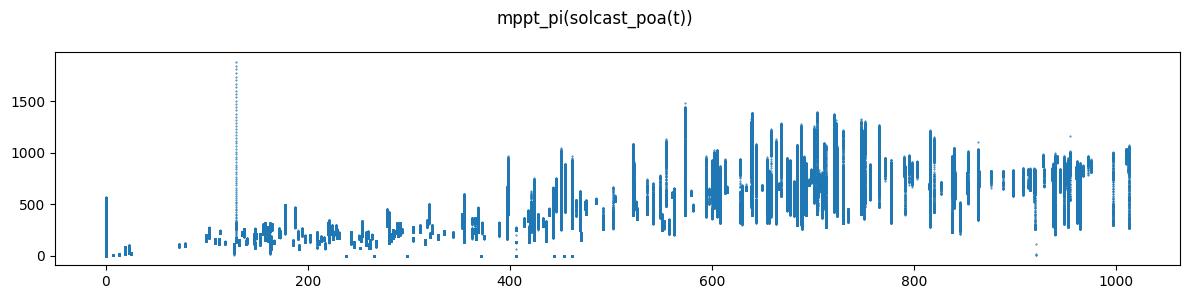

In [ ]:
plt.figure(figsize=(12, 3))
plt.suptitle("bat_po(esc_dt(t))")
plt.scatter(df["esc_dt"], df["bat_po"], s=0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("bat_v(esc_dt(t))")
plt.scatter(df["esc_dt"], df["bat_v"], s=0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("motor_rpm(esc_dt(t))")
plt.scatter(df["esc_dt"], df["motor_rpm"], s=0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("prop_pi(esc_pi(t)) (modelled data)")
plt.scatter(df["esc_pi"], df["prop_pi"], s=0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("mppt_pi(solcast_poa(t))")
plt.scatter(df["solcast_poa"], df["mppt_pi"], s=0.2)
plt.tight_layout()
plt.show()
